In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import VisualTools_V1 as vt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

### 1、可视化介绍

#### 1.1 基础可视化类型

在做图表设计时候经常面临着怎么选用合适的图表，图表展示的关系分为四大类 (点击下图放大)：

（1）**分布** (distribution)  
（2）**联系** (relationship)  
（3）**比较** (comparison)  
（4）**构成** (composition)  

![](./img/图表展示关系图.jpg)

在选用图表前首先要想清楚：你要表达什么样的数据关系。上面的图表分类太过繁多，我们只讨论在量化金融中用的最多的几种类型，即:

- 用**直方图**来展示股票价格和收益的**分布**
- 用**散点图**来展示两支股票之间的**联系**
- 用**折线图**来**比较**汇率在不同窗口的移动平均线
- 用**饼状图**来展示股票组合的**构成**成分

#### 1.2 增强可视化类型

（1）对聚类结果进行可视化，用于分群建模时的类别展示

- 采用**PCA**将高维数据降维到二维，对不同类别进行可视化展示（速度较快）；
- 采用**t-SNE**将高维数据降维到二维，对不同类别进行可视化展示（速度较慢，但效果更好）；


### 2、可视化工具库

**（1）功能：**

模板化常用的可视化方法

**（2）方法：**

- 分布：
  - 直方图
  - 箱线图
  - 核密度曲线(单条、多条)
- 联系：
  - 散点图
  - 气泡图
  - 热力图
- 比较：
  - 折线图（单坐标系、双坐标系）
  - 柱状图（水平、竖直、加入折线图）
- 组成：
  - 饼图
- 聚类：
  - PCA
  - t-SNE

**（3）支持数据类型：**

- 单变量
  - 1维数组
  - Series
- 多变量
  - 2维数组
  - DataFrame

### 3、测试

#### 3.1 分布

#### 3.1.1 直方图

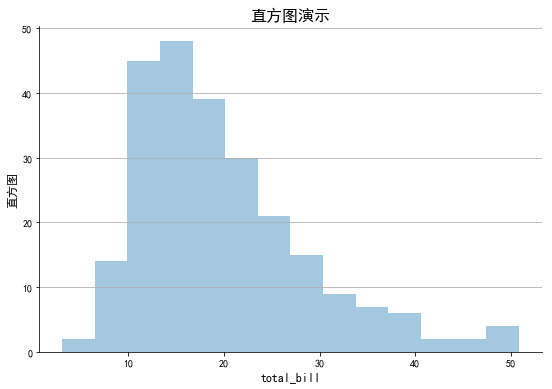

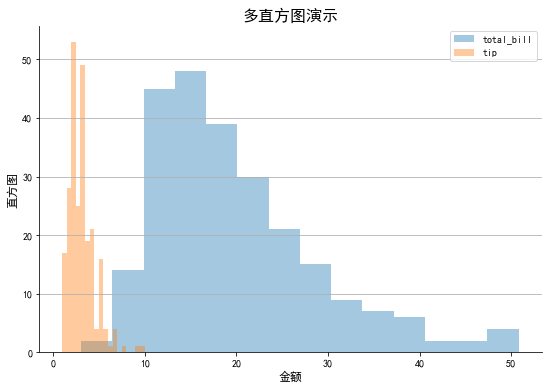

In [2]:
tips = sns.load_dataset("tips")
# 一维
vt.plot_dist(tips['total_bill'], xlabel='total_bill', ylabel='直方图', title='直方图演示', kde=False)
# 二维
vt.plot_dist(tips[['total_bill', 'tip']], xlabel='金额', ylabel='直方图', title='多直方图演示', kde=False)

#### 3.1.2 箱线图

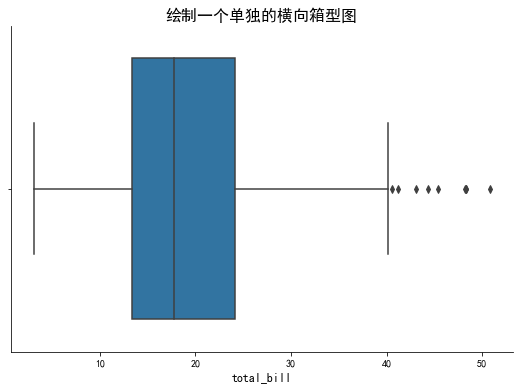

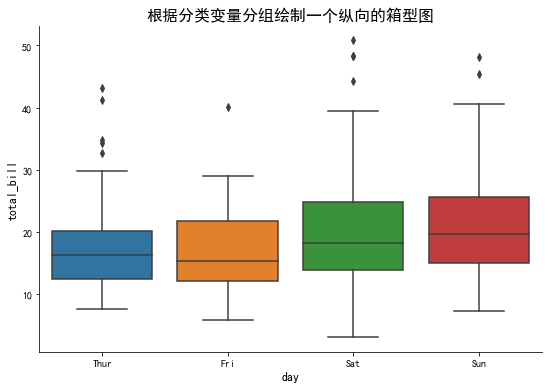

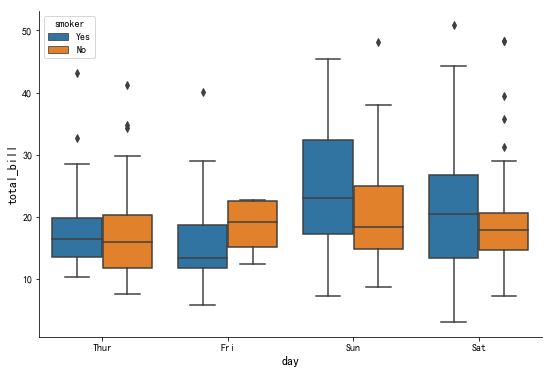

In [3]:
tips = sns.load_dataset("tips")
# 一维
vt.plot_box(x=tips["total_bill"], title='绘制一个单独的横向箱型图')
# 二维
vt.plot_box(x="day", y="total_bill", data=tips, title='根据分类变量分组绘制一个纵向的箱型图')
# 三维
vt.plot_box(x="day", y="total_bill", hue="smoker", data=tips, order=["Thur", "Fri", "Sun", "Sat"])

#### 3.1.3 核密度曲线

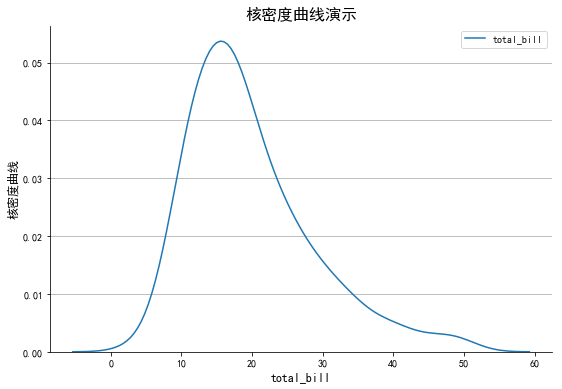

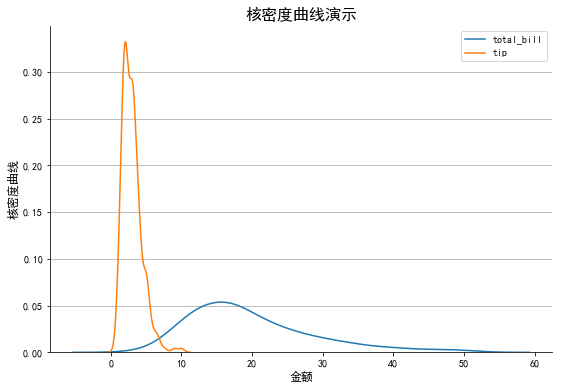

In [4]:
tips = sns.load_dataset("tips")
# 一维
vt.plot_kde(tips['total_bill'], xlabel='total_bill', ylabel='核密度曲线', title='核密度曲线演示')
# 二维
vt.plot_kde(tips[['total_bill', 'tip']], xlabel='金额', ylabel='核密度曲线', title='核密度曲线演示')

#### 3.2 联系：
  
#### 3.2.1 散点图

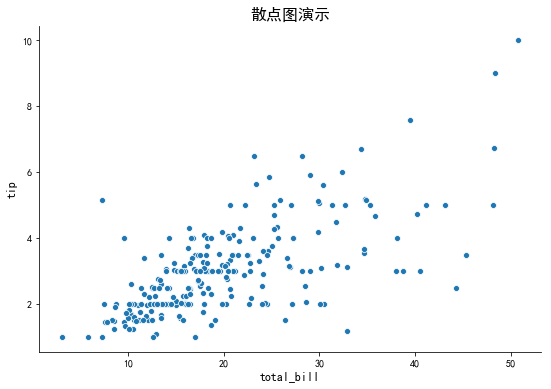

In [5]:
vt.plot_scatter(x="total_bill", y="tip", data=tips, title='散点图演示')

#### 3.2.2 气泡图

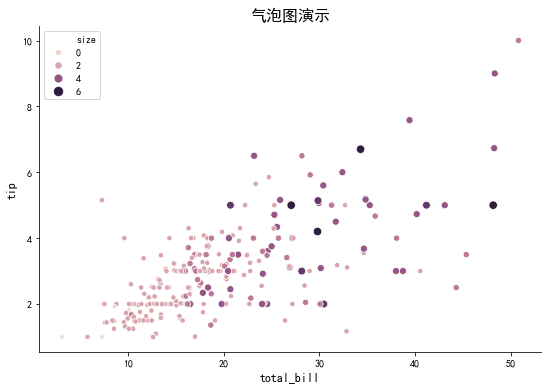

In [6]:
vt.plot_scatter(x="total_bill", y="tip", hue="size", size="size", data=tips, title='气泡图演示')

#### 3.2.3 热力图

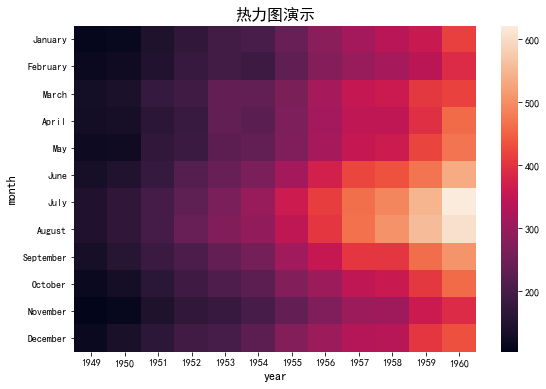

In [7]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
vt.plot_heatmap(data=flights, title='热力图演示')

#### 3.3 比较

#### 3.3.1 折线图

- 单坐标系

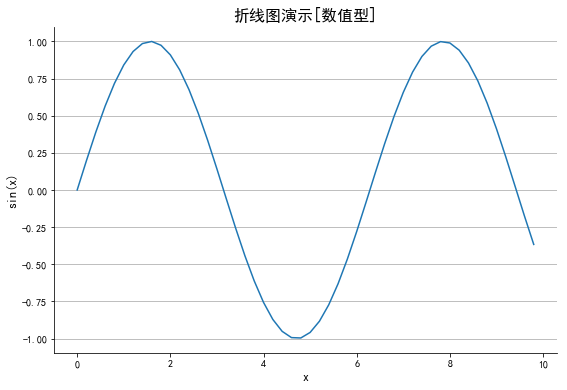

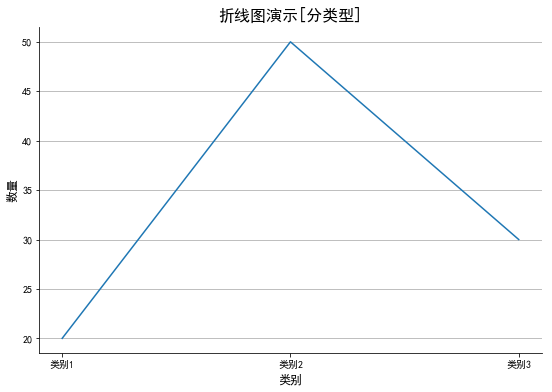

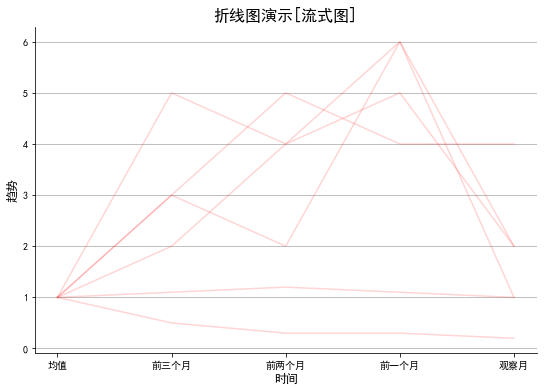

In [8]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)
vt.plot_line(x, y, 'x', 'sin(x)', '折线图演示[数值型]')

x = np.array(['类别1', '类别2', '类别3'])
y = np.array([20, 50, 30])
vt.plot_line(x, y, '类别', '数量', '折线图演示[分类型]')

data = pd.DataFrame({'均值':[1,1,1,1,1,1], '前三个月':[2,3,3,0.5,1.1,5], '前两个月':[4,5,2,0.3,1.2,4], '前一个月':[5,4,6,0.3,1.1,6], 
                     '观察月':[2,4,2,0.2,1,1]})
vt.plot_line(data.columns.values, data.values, color='#FF3030',alpha=0.2, xlabel='时间', ylabel='趋势', title='折线图演示[流式图]')

- 双坐标系

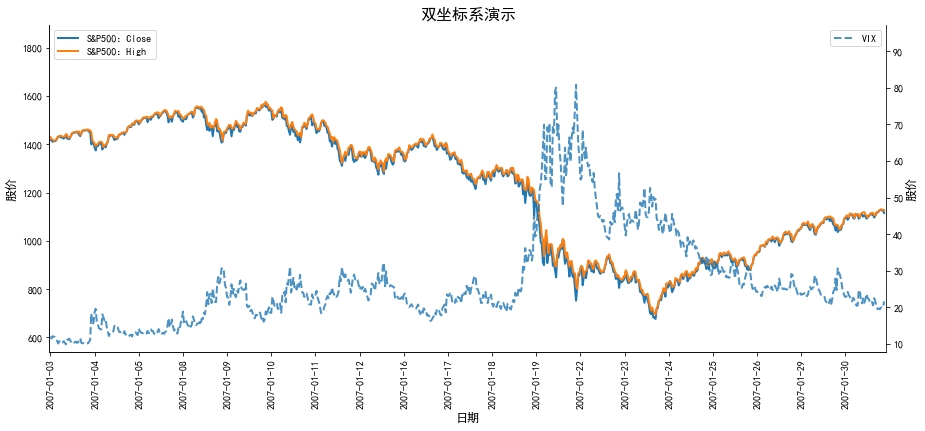

In [3]:
data = pd.read_csv( './data/S&P500.csv', index_col=0, parse_dates=True, dayfirst=True )
spx = data[['Adj Close', 'High']].loc['2007-01-01':'2010-01-01']
data = pd.read_csv( './data/VIX.csv', index_col=0, parse_dates=True, dayfirst=True )
vix = data[['Adj Close']].loc['2007-01-01':'2010-01-01']
x = np.array([date.strftime('%Y-%m-%d') for date in spx.index])

vt.plot_line_twinx(x, spx.T.values, vix.T.values, xlabel='日期', y1_label='股价', y2_label='股价', title='双坐标系演示', figsize=(15,6),
                y1_legend=['S&P500：Close', 'S&P500：High'], y2_legend=['VIX'], rot=90)

#### 3.3.2 柱状图

- 水平

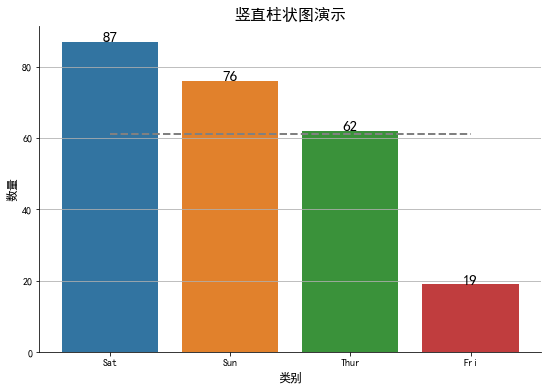

In [10]:
tips = sns.load_dataset("tips")
tips_day = tips['day'].value_counts()
vt.plot_bar(np.array(tips_day.index), np.array(tips_day.values), '类别', '数量', '竖直柱状图演示', hlines=tips_day.values.mean())

- 竖直

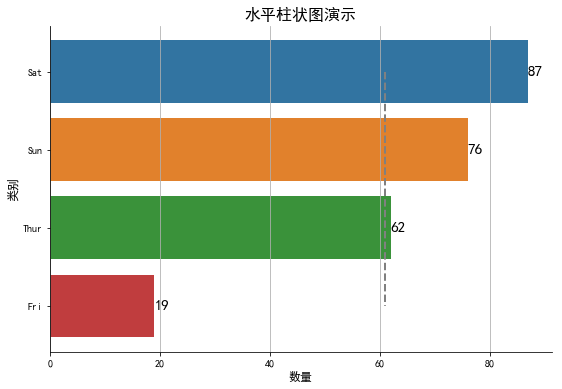

In [11]:
tips = sns.load_dataset("tips")
tips_day = tips['day'].value_counts()
vt.plot_barh(np.array(tips_day.values), np.array(tips_day.index), '数量', '类别', '水平柱状图演示', 
             vlines=tips_day.values.mean(), grid_axis='x')

- 多维度

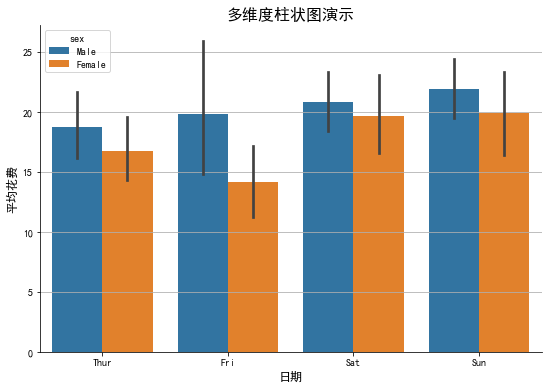

In [12]:
tips = sns.load_dataset("tips")
vt.plot_multi_bar(tips["day"], tips["total_bill"], tips["sex"], xlabel='日期', ylabel='平均花费', title='多维度柱状图演示')

#### 3.4 组成

- 饼图

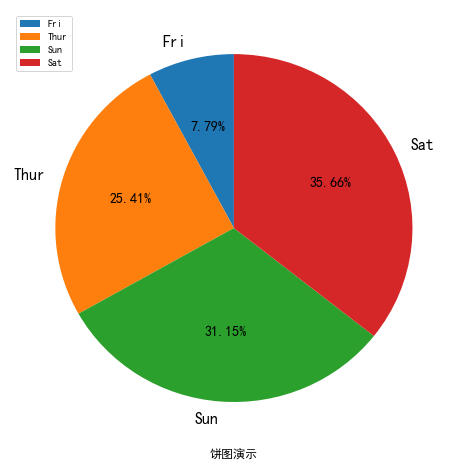

In [13]:
tips_day = tips['day'].value_counts()
vt.plot_pie(np.array(tips_day.index), tips_day.values, xlabel='饼图演示')

#### 3.5 聚类

#### 3.5.1 PCA

In [14]:
from sklearn.datasets import load_iris, load_digits

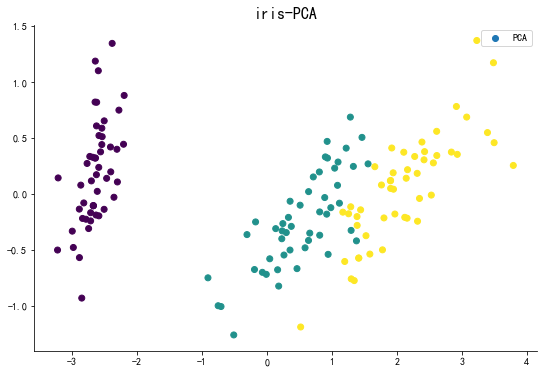

In [15]:
iris = load_iris()
vt.plot_clustermap(iris.data, iris.target, method='PCA', title='iris-PCA')

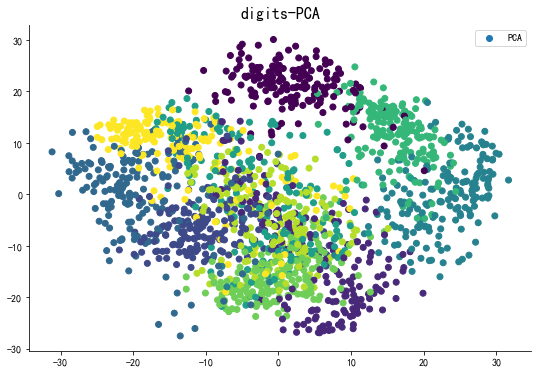

In [16]:
digits = load_digits()
vt.plot_clustermap(digits.data, digits.target, method='PCA', title='digits-PCA')

#### 3.5.2 t-SNE

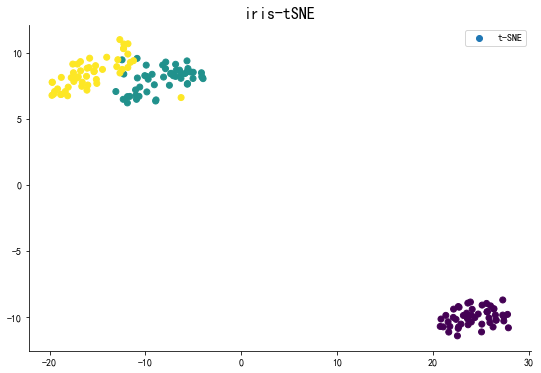

In [17]:
vt.plot_clustermap(iris.data, iris.target, method='t-SNE', title='iris-tSNE')

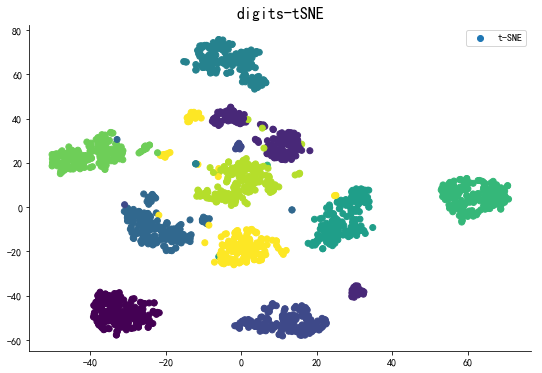

In [18]:
vt.plot_clustermap(digits.data, digits.target, method='t-SNE', title='digits-tSNE')

#### 3.6 补充功能

#### 3.6.1 加水印

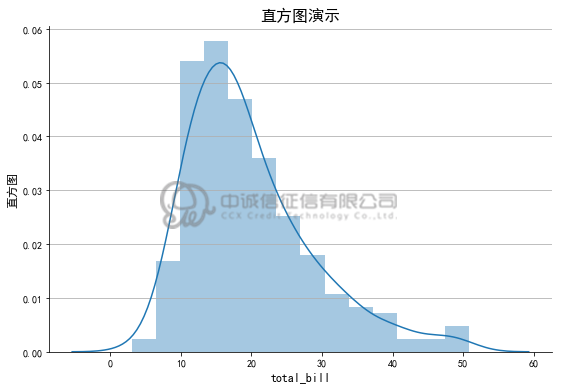

In [19]:
tips = sns.load_dataset("tips")
vt.plot_dist(tips['total_bill'].values, xlabel='total_bill', ylabel='直方图', title='直方图演示', \
             mark=True, mark_dir='./img/ccx.png', mark_xo=160, mark_yo=160, mark_alpha=.5)

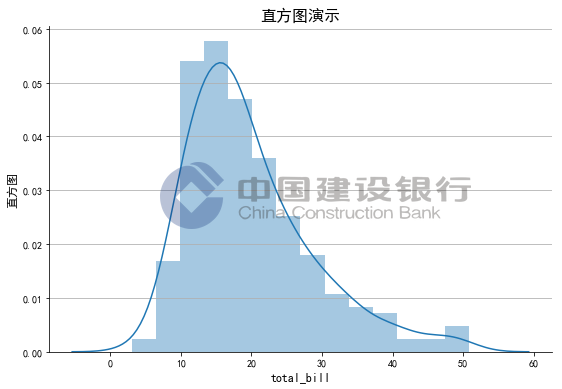

In [20]:
vt.plot_dist(tips['total_bill'].values, xlabel='total_bill', ylabel='直方图', title='直方图演示', \
             mark=True, mark_dir='./img/ccb.png', mark_resize=0.1, mark_xo=160, mark_yo=160, mark_alpha=.3)